In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("bread basket.csv")

In [3]:
data

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction,20507.0,4976.20237,2796.203001,1.0,2552.0,5137.0,7357.0,9684.0


In [5]:
data.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [6]:
data["date_time"] = pd.to_datetime(data["date_time"])

data["date"] = data["date_time"].dt.date

data["time"] = data["date_time"].dt.time

data["month"] = data["date_time"].dt.month

data["month"] = data["month"].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), ('January', 'February',
                                                                                'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))

data["day"] = data["date_time"].dt.weekday

data["day"] = data["day"].replace((1, 2, 3, 4, 5, 6, 7), (
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

data["Hour"] = data["date_time"].dt.hour

data.drop("date_time", axis=1, inplace=True)

In [8]:
viewing = pd.DataFrame(data)
viewing

,Transaction,Item,period_day,weekday_weekend,date,time,month,day,Hour
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,Saturday,9
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Saturday,10
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Saturday,10
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,Saturday,10
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,Saturday,10
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,afternoon,weekend,2017-09-04,14:32:00,September,0,14
20503,9682,Tea,afternoon,weekend,2017-09-04,14:32:00,September,0,14
20504,9683,Coffee,afternoon,weekend,2017-09-04,14:57:00,September,0,14
20505,9683,Pastry,afternoon,weekend,2017-09-04,14:57:00,September,0,14


In [9]:
coutbyhour = data.groupby('Hour')['Transaction'].count().reset_index()
coutbyhour.sort_values('Hour', inplace=True)

In [10]:
data

,Transaction,Item,period_day,weekday_weekend,date,time,month,day,Hour
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,Saturday,9
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Saturday,10
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,Saturday,10
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,Saturday,10
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,Saturday,10
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,afternoon,weekend,2017-09-04,14:32:00,September,0,14
20503,9682,Tea,afternoon,weekend,2017-09-04,14:32:00,September,0,14
20504,9683,Coffee,afternoon,weekend,2017-09-04,14:57:00,September,0,14
20505,9683,Pastry,afternoon,weekend,2017-09-04,14:57:00,September,0,14


Visualizing the data to seeing at what time where the ingoing and purchasing are being made

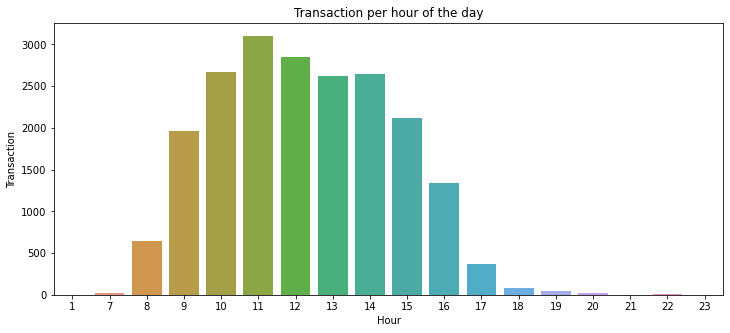

In [11]:
fig = plt.figure(figsize=(12, 5))
sns.barplot(x=coutbyhour['Hour'], y=coutbyhour['Transaction'])
plt.xlabel('Hour')
plt.ylabel('Transaction')
plt.title('Transaction per hour of the day')
plt.show()

Coverting the data into meaningfull data that can be used for the Apriori algorithm byy grouping the tranasction to transaction number item and count and then creating a pivot table to transpoing the transaction with items in columns and adding count values to then for fitting the algorithm

In [15]:
transactions = data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name='Count')
table = transactions.pivot_table(index="Transaction", columns="Item", values="Count", aggfunc="sum").fillna(0)


In [16]:
transactions

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [17]:
table

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def se(x):
    if x == 0:
        return 0

    if (x > 0):
        return 1


In [19]:
final_table = table.applymap(se)

In [20]:
final_table

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from mlxtend.frequent_patterns import apriori, association_rules
frequence = apriori(final_table, min_support=0.015, use_colnames=True)
rules = association_rules(frequence, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
5,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
9,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865


Sorting the values according to the cofidence bonds 

In [22]:
rules.sort_values('confidence', ascending=False, inplace=True)

In [23]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
17,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
20,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
14,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
22,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
25,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
11,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
12,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
